 # Model prediction

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

 ## Importing dataset

In [6]:
# Importing complete dataset
# Read the file content as a DataFrame
species_df = pd.read_csv("C:/Users/Afra Muhammad/OneDrive/1 - Laptop Asus\Documents//species.csv",sep=",",index_col=0)

In [7]:
df = species_df

In [8]:
df.head(10)

,site,model,Year,Month,Latitude,Longitude,Depth,Region,Coral_cover,Reef_complexity,...,Pop_per_area_reef_20km,Random,impact,YEAR,HABITAT_CD,REGION,PCT_CORAL,MAX_HARD_RELIEF,no.divers,Diversity_index
0,4733520_128U,biomass,2005,August,24.446433,-81.962900,9.800000,FLA KEYS,2.000000,0.550322,...,0.047128,3786,0.205,2005,ISOL_LR,FLA KEYS,2.000000,0.550322,4,0.877755
1,4966028_487U,impact,2005,June,24.461130,-81.840099,8.821212,FLA KEYS,6.181818,1.886364,...,0.403795,503,0.382,2005,SPGR_HR,FLA KEYS,6.181818,1.886364,4,0.912085
2,4981032_102U,biomass,2005,July,24.467250,-81.832367,17.399239,FLA KEYS,7.506345,0.749873,...,0.392888,3430,NaN,2005,CONT_LR,FLA KEYS,7.506345,0.749873,4,0.882112
3,4999782_141U,impact,2005,August,24.468767,-81.822167,9.200000,FLA KEYS,10.000000,0.400000,...,0.386919,3696,NaN,2005,ISOL_LR,FLA KEYS,10.000000,0.400000,4,0.806049
4,5026033_475U,impact,2005,June,24.470206,-81.808148,8.558032,FLA KEYS,2.870486,0.289415,...,0.383887,4090,NaN,2005,ISOL_LR,FLA KEYS,2.870486,0.289415,4,0.829156
5,5067281_105U,biomass,2005,July,24.466283,-81.786533,26.504821,FLA KEYS,17.620519,1.200000,...,0.408742,7886,0.382,2005,SPGR_LR,FLA KEYS,17.620519,1.200000,4,0.826781
6,5157285_104U,impact,2005,July,24.474067,-81.739067,8.696966,FLA KEYS,25.018963,1.149431,...,0.389774,3052,NaN,2005,SPGR_LR,FLA KEYS,25.018963,1.149431,4,0.934887
7,5168534_472U,biomass,2005,June,24.471833,-81.733867,20.300000,FLA KEYS,6.000000,1.300000,...,0.391648,8192,NaN,2005,SPGR_LR,FLA KEYS,6.000000,1.300000,2,0.853695
8,5187287_495U,biomass,2005,June,24.477337,-81.722680,20.463554,FLA KEYS,9.817768,1.700000,...,0.380080,8662,0.382,2005,SPGR_LR,FLA KEYS,9.817768,1.700000,4,0.837965
9,5194788_112U,biomass,2005,July,24.479050,-81.718833,9.500000,FLA KEYS,2.493606,0.849361,...,0.375463,1990,NaN,2005,SPGR_HR,FLA KEYS,2.493606,0.849361,4,0.890591


In [9]:
df.tail(10)

,site,model,Year,Month,Latitude,Longitude,Depth,Region,Coral_cover,Reef_complexity,...,Pop_per_area_reef_20km,Random,impact,YEAR,HABITAT_CD,REGION,PCT_CORAL,MAX_HARD_RELIEF,no.divers,Diversity_index
3989,361106_3022U,impact,2018,September,26.942742,-80.011750,23.348518,SEFCRI,0.247529,0.248765,...,1.356936,181,0.341,2018,DPRC,SEFCRI,0.247529,0.248765,2,0.905753
3990,1885517_3265U,biomass,2018,September,25.893955,-80.087125,24.201753,SEFCRI,3.502191,1.449343,...,14.528516,2698,0.583,2018,SPGR,SEFCRI,3.502191,1.449343,2,0.371389
3991,2000265_1230U,impact,2018,September,25.563808,-80.099100,10.490331,FLA KEYS,2.263359,1.504453,...,0.318765,3486,0.724,2018,CONT_MR,FLA KEYS,2.263359,1.504453,2,0.867506
3992,2037709_3232U,impact,2018,September,25.789150,-80.088196,14.844125,SEFCRI,1.000000,0.908094,...,12.523497,2440,0.707,2018,LIRO,SEFCRI,1.000000,0.908094,2,0.812486
3993,2063293_3272U,impact,2018,September,25.771713,-80.087913,17.040414,SEFCRI,1.252820,0.925846,...,12.052737,7908,0.709,2018,LIRO,SEFCRI,1.252820,0.925846,2,0.812745
3994,2065262_3278U,impact,2018,September,25.770183,-80.087650,17.953469,SEFCRI,1.000000,0.834130,...,12.064380,6958,0.709,2018,APRD,SEFCRI,1.000000,0.834130,2,0.829341
3995,1223281_1188U,impact,2018,September,24.580356,-81.303040,7.148084,FLA KEYS,1.246807,0.498723,...,0.042837,7602,NaN,2018,CONT_LR,FLA KEYS,1.246807,0.498723,2,0.831818
3996,2003949_1803U,biomass,2018,September,25.590833,-80.096706,2.455478,FLA KEYS,1.795652,0.535043,...,0.402824,5480,0.705,2018,RUBB_LR,FLA KEYS,1.795652,0.535043,2,0.824709
3997,1966838_3070U,impact,2018,September,25.838121,-80.099420,8.145070,SEFCRI,1.000000,0.601972,...,14.823301,3575,0.740,2018,LIRI,SEFCRI,1.000000,0.601972,2,0.857023
3998,1990470_3097U,impact,2018,September,25.821798,-80.091136,14.344588,SEFCRI,1.000000,0.551203,...,13.893536,3506,0.740,2018,LIRM,SEFCRI,1.000000,0.551203,2,0.745798


This is clearly a typical supervised learning task, since the model can be trained with labeled examples, it is typically regression task, since the model will bw asked to predict values and Finally, there is no continuous flow of data coming into the system, there is no particular need to adjust to changing data rapidly, and the data is small enough to fit in memory, so plain batch learning should do just fine.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 0 to 3998
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   site                         3999 non-null   object 
 1   model                        3999 non-null   object 
 2   Year                         3999 non-null   int64  
 3   Month                        3999 non-null   object 
 4   Latitude                     3999 non-null   float64
 5   Longitude                    3999 non-null   float64
 6   Depth                        3999 non-null   float64
 7   Region                       3999 non-null   object 
 8   Coral_cover                  3292 non-null   float64
 9   Reef_complexity              3292 non-null   float64
 10  SST                          3999 non-null   float64
 11  NPP                          3999 non-null   float64
 12  Wave_exposure                3999 non-null   float64
 13  Habitat_type_classLV0  

In [11]:
# List of columns to remove
df1=df.drop(columns=['FKNMS','DryTortugas','BNP','CoralECA','Total_gravity_intercept','Keys_Divisions'])

In [12]:
df1.describe

<bound method NDFrame.describe of                site    model  Year      Month   Latitude  Longitude  \
0      4733520_128U  biomass  2005     August  24.446433 -81.962900   
1      4966028_487U   impact  2005       June  24.461130 -81.840099   
2      4981032_102U  biomass  2005       July  24.467250 -81.832367   
3      4999782_141U   impact  2005     August  24.468767 -81.822167   
4      5026033_475U   impact  2005       June  24.470206 -81.808148   
...             ...      ...   ...        ...        ...        ...   
3994  2065262_3278U   impact  2018  September  25.770183 -80.087650   
3995  1223281_1188U   impact  2018  September  24.580356 -81.303040   
3996  2003949_1803U  biomass  2018  September  25.590833 -80.096706   
3997  1966838_3070U   impact  2018  September  25.838121 -80.099420   
3998  1990470_3097U   impact  2018  September  25.821798 -80.091136   

          Depth    Region  Coral_cover  Reef_complexity  ...  \
0      9.800000  FLA KEYS     2.000000         0.

 ### Checking and treating missing values

In [13]:
# Check for missing values in each column
df1.isna().sum()

site                              0
model                             0
Year                              0
Month                             0
Latitude                          0
Longitude                         0
Depth                             0
Region                            0
Coral_cover                     707
Reef_complexity                 707
SST                               0
NPP                               0
Wave_exposure                     0
Habitat_type_classLV0             0
Habitat_type_classLV2             0
Coral_area_UFRTM_20km             0
Coral_area_UFRTM_200km            0
Depth_Sbrocco                     0
Deepwater                         0
FSA                               0
Marina_slips_10km                 0
Marina_slips_25km                 0
Marine_reserve                    0
Population_20km                   0
Population_50km                   0
Recreational_fishermen_50km       0
Tourist_fishing                   0
Artificial_reefs_1km        

 ## Handling Missing Values
Columns with Missing Values:¶

For these columns, we can use imputation mean methods to fill in the missing values.

In [14]:
# Check for missing values in each column
missing_values = df1.isna().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
site                              0
model                             0
Year                              0
Month                             0
Latitude                          0
Longitude                         0
Depth                             0
Region                            0
Coral_cover                     707
Reef_complexity                 707
SST                               0
NPP                               0
Wave_exposure                     0
Habitat_type_classLV0             0
Habitat_type_classLV2             0
Coral_area_UFRTM_20km             0
Coral_area_UFRTM_200km            0
Depth_Sbrocco                     0
Deepwater                         0
FSA                               0
Marina_slips_10km                 0
Marina_slips_25km                 0
Marine_reserve                    0
Population_20km                   0
Population_50km                   0
Recreational_fishermen_50km       0
Tourist_fishing                  

In [15]:
# Calculate the mean only for numeric columns
numeric_cols = df1.select_dtypes(include=['number']).columns
mean_values = df1[numeric_cols].mean()

# Replace missing values in numeric columns with their respective means
df1[numeric_cols] = df1[numeric_cols].fillna(mean_values)

# Verify if missing values are replaced
print("\nMissing values after replacement:")
print(df1.isna().sum())


Missing values after replacement:
site                           0
model                          0
Year                           0
Month                          0
Latitude                       0
Longitude                      0
Depth                          0
Region                         0
Coral_cover                    0
Reef_complexity                0
SST                            0
NPP                            0
Wave_exposure                  0
Habitat_type_classLV0          0
Habitat_type_classLV2          0
Coral_area_UFRTM_20km          0
Coral_area_UFRTM_200km         0
Depth_Sbrocco                  0
Deepwater                      0
FSA                            0
Marina_slips_10km              0
Marina_slips_25km              0
Marine_reserve                 0
Population_20km                0
Population_50km                0
Recreational_fishermen_50km    0
Tourist_fishing                0
Artificial_reefs_1km           0
SG_permits_50km                0
SG_chart

## Dataset encoding

In [16]:
# Identify non-numerical columns
non_numeric_cols = df1.select_dtypes(exclude=['number']).columns
print("Non-numerical columns:")
print(non_numeric_cols)

Non-numerical columns:
Index(['site', 'model', 'Month', 'Region', 'Habitat_type_classLV0',
       'Habitat_type_classLV2', 'Marine_reserve', 'HABITAT_CD', 'REGION'],
      dtype='object')


In [17]:
# Drop irrelevant columns (replace 'site' and 'model' )
df2= df1.drop(columns=['site', 'model']) 

In [18]:
# Apply one-hot encoding to non-numerical columns
df2 = pd.get_dummies(df1, columns=non_numeric_cols, drop_first=True)

# Display the first few rows of the resulting DataFrame
print("\nDataFrame after one-hot encoding:")
print(df2.head())


DataFrame after one-hot encoding:
   Year   Latitude  Longitude      Depth  Coral_cover  Reef_complexity  \
0  2005  24.446433 -81.962900   9.800000     2.000000         0.550322   
1  2005  24.461130 -81.840099   8.821212     6.181818         1.886364   
2  2005  24.467250 -81.832367  17.399239     7.506345         0.749873   
3  2005  24.468767 -81.822167   9.200000    10.000000         0.400000   
4  2005  24.470206 -81.808148   8.558032     2.870486         0.289415   

         SST         NPP  Wave_exposure  Coral_area_UFRTM_20km  ...  \
0  23.595392  550.865051       6.992729                  88333  ...   
1  23.578271  577.431946       6.950751                  91742  ...   
2  23.551355  595.320252       6.950181                  94607  ...   
3  23.556451  590.443543       6.959807                  96139  ...   
4  23.567590  579.874023       6.914992                  98167  ...   

   HABITAT_CD_LIRO  HABITAT_CD_PTCH  HABITAT_CD_RGDP  HABITAT_CD_RGSH  \
0            False  

 ### Identifing and treating outliers before Feature Scalling

Treating outliers in your dataset is an important step in data preprocessing. 

In [19]:
from scipy import stats
# Calculate the 99th percentile of the 'Diversity_index' column
percentile_value = df2["Diversity_index"].quantile(0.99)

# Print the 99th percentile value
print("99th percentile value for Diversity_index:", percentile_value)

99th percentile value for Diversity_index: 0.9393843081


In [20]:
# Remove the outliers above the 99th percentile
df3= df2[df1["Diversity_index"] <= percentile_value]

In [21]:
df3.describe() 

,Year,Latitude,Longitude,Depth,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Coral_area_UFRTM_20km,...,Rec_reliance,Commercial_pounds_landed,Pop_per_area_reef_20km,Random,impact,YEAR,PCT_CORAL,MAX_HARD_RELIEF,no.divers,Diversity_index
count,3959.000000,3959.000000,3959.000000,3959.000000,3959.000000,3959.000000,3959.000000,3959.000000,3959.000000,3959.000000,...,3959.000000,3.959000e+03,3959.000000,3959.000000,3959.000000,3959.000000,3959.000000,3959.000000,3959.000000,3959.000000
mean,2012.875726,25.364325,-80.909452,12.055224,4.540252,1.097072,23.761984,523.253918,7.322484,76737.625663,...,0.423425,6.298175e+05,6.414924,5051.066431,0.401573,2012.875726,4.540252,1.097072,3.114423,0.830328
std,3.622569,0.807997,1.049015,6.952301,4.999244,0.771558,0.551658,163.570323,0.211440,44697.144705,...,2.217329,4.852597e+05,11.122624,2916.997493,0.234542,3.622569,4.999244,0.771558,0.998630,0.114789
min,2005.000000,24.431943,-82.986818,1.300482,0.000000,0.075887,22.405206,287.664307,5.213092,12257.000000,...,-0.185000,1.706314e+05,0.000000,1.000000,0.000000,2005.000000,0.000000,0.075887,2.000000,0.000000
25%,2011.000000,24.633132,-81.690988,6.398024,1.744907,0.574108,23.611047,365.582459,7.294536,50597.500000,...,-0.185000,2.469954e+05,0.039334,2553.000000,0.348000,2011.000000,1.744907,0.574108,2.000000,0.811100
50%,2013.000000,25.123400,-80.290895,10.199640,3.502457,1.100154,23.930048,533.787293,7.368210,60695.000000,...,-0.185000,3.180504e+05,0.249901,5108.000000,0.400637,2013.000000,3.502457,1.100154,4.000000,0.866258
75%,2016.000000,26.038378,-80.092729,17.198121,4.549828,1.299708,24.200861,632.628479,7.455555,91775.500000,...,0.044000,8.556702e+05,12.712452,7602.000000,0.497000,2016.000000,4.549828,1.299708,4.000000,0.898718
max,2018.000000,27.189445,-79.993800,32.295441,55.000000,10.538338,24.436212,1330.589233,7.597482,280125.000000,...,12.140000,1.511066e+06,55.371104,9997.000000,1.000000,2018.000000,55.000000,10.538338,8.000000,0.939381


## Feature Scaling and Transformation

Feature scaling and transformation are critical steps in developing a machine learning project because they ensure that all features contribute equally to the model's learning process. Many algorithms, especially those based on distance (e.g., K-Nearest Neighbors, SVM) or gradient descent optimization (e.g., Linear Regression, Neural Networks), are sensitive to the scale of the input data. Without scaling, features with larger magnitudes may dominate the learning process, leading to biased results and poor model performance. By standardizing or normalizing features, we can improve the model's convergence speed, accuracy, and overall effectiveness, ensuring that each feature is properly accounted for in the learning process.

In [22]:
from sklearn.preprocessing import MinMaxScaler
# Identify numerical columns for scaling
numerical_cols = df3.select_dtypes(include=['number']).columns

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Apply Min-Max Scaling to numerical columns
df1_scaled = df3.copy()  # Make a copy of the DataFrame
df1_scaled[numerical_cols] = scaler.fit_transform(df3[numerical_cols])

## Model prediction

 ### Linear Regression Model

In [23]:
# Define the target column
target_column = 'Diversity_index'

# Separate features and target variable
X = df1_scaled.drop(columns=[target_column])
y = df1_scaled[target_column]


In [24]:
import numpy as np

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Compute RMSE
rmse = np.sqrt(mse)

# Display results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) score:", r2)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Mean Squared Error (MSE): 0.013251798864931103
Root Mean Squared Error (RMSE): 0.11511645783697091
R-squared (R2) score: 0.15143657876750793
Model Coefficients: [ 0.19275223 -0.06135352  0.00817126 ...  0.02382623 -0.01690437
  0.02029342]
Model Intercept: 0.8178258504572252


### Random Forest regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [26]:
# Define the target column
target_column = 'Diversity_index'

In [27]:
# Separate features and target variable
X = df1_scaled.drop(columns=[target_column])
y = df1_scaled[target_column]

In [29]:
import numpy as np

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using the trained Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Compute and print R² score for Random Forest model
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest R² score: {r2_rf:.4f}")

# Compute and print Mean Squared Error for Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf:.4f}")

# Compute and print Root Mean Squared Error for Random Forest model
rmse_rf = np.sqrt(mse_rf)
print(f"Random Forest Root Mean Squared Error: {rmse_rf:.4f}")

# Display feature importances
print("Random Forest Feature Importances:", rf_model.feature_importances_)


Random Forest R² score: 0.1638
Random Forest Mean Squared Error: 0.0131
Random Forest Root Mean Squared Error: 0.1143
Random Forest Feature Importances: [1.14238850e-02 2.53855379e-02 1.64672452e-02 ... 6.02819946e-04
 4.00480882e-05 2.56981832e-05]


The Random Forest model achieved an R² score of 0.1638 and a Mean Squared Error (MSE) of 0.0131. The R² score indicates that the Random Forest model explains approximately 16.38% of the variance in the target variable, which is slightly better than the Linear Regression model's R² score of 0.1514. The lower MSE compared to the Linear Regression model (0.0131 vs. 0.0133) suggests that the Random Forest model predicts the target variable with slightly less error.

Overall, while both models perform similarly, the Random Forest model has a slight edge in both variance explanation and prediction accuracy. This suggests that the Random Forest model may be better suited for capturing complex relationships in the data compared to the Linear Regression model.

### Gradient Boosting Regressor

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# Define the target column
target_column = 'Diversity_index'

In [32]:
import numpy as np

# Separate features and target variable
X = df1_scaled.drop(columns=[target_column])
y = df1_scaled[target_column]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Predict on the test set using Gradient Boosting Regressor
y_pred_gbr = gbr.predict(X_test)

# Evaluate Gradient Boosting Regressor
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Regressor:")
print("Mean Squared Error:", mse_gbr)
print("Root Mean Squared Error:", rmse_gbr)
print("R² Score:", r2_gbr)
print()

# Support Vector Regressor
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

# Predict on the test set using Support Vector Regressor
y_pred_svr = svr.predict(X_test)

# Evaluate Support Vector Regressor
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regressor:")
print("Mean Squared Error:", mse_svr)
print("Root Mean Squared Error:", rmse_svr)
print("R² Score:", r2_svr)


Gradient Boosting Regressor:
Mean Squared Error: 0.013135495191919283
Root Mean Squared Error: 0.11461018799356051
R² Score: 0.1588839482664508

Support Vector Regressor:
Mean Squared Error: 0.0142473466274826
Root Mean Squared Error: 0.11936224959124472
R² Score: 0.08768784367112425


 ### Interpretation of Results:
Gradient Boosting Regressor:

    Mean Squared Error (MSE): 0.0131
    R² Score: 0.1589

The Gradient Boosting Regressor performs slightly better than the Linear Regression model (R² of 0.1514) and on par with the Random Forest Regressor (R² of 0.1638). The MSE of 0.0131 is very close to the Random Forest's MSE, indicating that the Gradient Boosting model predicts with similar accuracy. However, the R² score suggests that this model explains only about 15.89% of the variance in the target variable, which is modest and similar to the other models.

Linear Regression had an R² score of 0.1514 and an MSE of 0.0133. While simple and interpretable, it does not capture complex relationships as effectively as the ensemble models.

Random Forest Regressor outperformed the Linear Regression with an R² score of 0.1638 and an MSE of 0.0131, indicating that it was slightly better at capturing the patterns in the data.

Gradient Boosting Regressor closely follows the Random Forest with an R² score of 0.1589 and an MSE of 0.0131, showing comparable performance.

### Conclusion and Next Steps:
Given the relatively low R² scores across all models, it is clear that the current dataset is not fully capturing the complexity of the relationships needed to accurately predict the diversity index. One significant limitation of the current dataset is the absence of detailed species count data, which is likely crucial for understanding and predicting the diversity index.

To improve the model's performance, it is essential to incorporate more detailed data, particularly the SpecAbund dataset, which includes information on the abundance of each species. By using this more granular dataset, we can repeat the modeling process and potentially improve the evaluation metrics. The additional data will provide a richer context for the models to learn from, which should lead to better predictive performance and a higher R² score, indicating a more accurate and 

 ## Feature Engineering

### Data augumentation

In [33]:
# Importing complete dataset
# Read the file content as a DataFrame
specAbund_df = pd.read_excel("C:/Users/Afra Muhammad/OneDrive/1 - Laptop Asus/Documents/SpecAbund.xlsx")

In [34]:
# Display the first few rows of the DataFrame
print(specAbund_df.head())

           site    model  Year   Month   Latitude  Longitude      Depth  \
0  4733520_128U  biomass  2005  August  24.446433 -81.962900   9.800000   
1  4966028_487U   impact  2005    June  24.461130 -81.840099   8.821212   
2  4981032_102U  biomass  2005    July  24.467250 -81.832367  17.399239   
3  4999782_141U   impact  2005  August  24.468767 -81.822167   9.200000   
4  5026033_475U   impact  2005    June  24.470206 -81.808148   8.558032   

     Region  Coral_cover  Reef_complexity  ...  Sphoeroides.spengleri  \
0  FLA KEYS     2.000000         0.550322  ...                    0.0   
1  FLA KEYS     6.181818         1.886364  ...                    0.0   
2  FLA KEYS     7.506345         0.749873  ...                    0.0   
3  FLA KEYS    10.000000         0.400000  ...                    0.0   
4  FLA KEYS     2.870486         0.289415  ...                    0.0   

   Stegastes.adustus  Stegastes.diencaeus Stegastes.leucostictus  \
0                0.0                  0.0 

In [35]:
# Merge the two DataFrames on the 'site' column
merged_df = specAbund_df.merge(species_df[['site', 'Diversity_index']], on='site', how='left')

In [36]:
specAbund_df['Diversity_index'] = merged_df['Diversity_index']

In [37]:
specAbund_df.head()

,site,model,Year,Month,Latitude,Longitude,Depth,Region,Coral_cover,Reef_complexity,...,Stegastes.adustus,Stegastes.diencaeus,Stegastes.leucostictus,Stegastes.partitus,Stegastes.planifrons,Stegastes.variabilis,Thalassoma.bifasciatum,Urobatis.jamaicensis,Xyrichtys.splendens,Diversity_index
0,4733520_128U,biomass,2005,August,24.446433,-81.962900,9.800000,FLA KEYS,2.000000,0.550322,...,0.0,0.0,0.0,72.0,0.0,8.0,228.0,0.0,0.0,0.877755
1,4966028_487U,impact,2005,June,24.461130,-81.840099,8.821212,FLA KEYS,6.181818,1.886364,...,0.0,0.0,2.0,68.0,14.0,10.0,146.0,0.0,0.0,0.912085
2,4981032_102U,biomass,2005,July,24.467250,-81.832367,17.399239,FLA KEYS,7.506345,0.749873,...,0.0,0.0,4.0,240.0,40.0,0.0,84.0,0.0,0.0,0.882112
3,4999782_141U,impact,2005,August,24.468767,-81.822167,9.200000,FLA KEYS,10.000000,0.400000,...,0.0,0.0,0.0,20.0,0.0,0.0,112.0,4.0,0.0,0.806049
4,5026033_475U,impact,2005,June,24.470206,-81.808148,8.558032,FLA KEYS,2.870486,0.289415,...,0.0,0.0,0.0,54.0,0.0,0.0,266.0,0.0,0.0,0.829156


In [38]:
specAbund_df.nunique()

site                      3999
model                        2
Year                        12
Month                        8
Latitude                  3984
                          ... 
Stegastes.variabilis       123
Thalassoma.bifasciatum     410
Urobatis.jamaicensis        10
Xyrichtys.splendens         63
Diversity_index           3990
Length: 179, dtype: int64

In [39]:
#dropping the columsn with only one unquie value
SpecAbund_df1=specAbund_df.drop(columns=['FKNMS','DryTortugas','BNP','CoralECA','Total_gravity_intercept','Keys_Divisions'])

In [40]:
print(SpecAbund_df1.dtypes)

site                       object
model                      object
Year                        int64
Month                      object
Latitude                  float64
                           ...   
Stegastes.variabilis      float64
Thalassoma.bifasciatum    float64
Urobatis.jamaicensis      float64
Xyrichtys.splendens       float64
Diversity_index           float64
Length: 173, dtype: object


In [41]:
SpecAbund_df1.describe()

,Year,Latitude,Longitude,Depth,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Coral_area_UFRTM_20km,...,Stegastes.adustus,Stegastes.diencaeus,Stegastes.leucostictus,Stegastes.partitus,Stegastes.planifrons,Stegastes.variabilis,Thalassoma.bifasciatum,Urobatis.jamaicensis,Xyrichtys.splendens,Diversity_index
count,3999.000000,3999.000000,3999.000000,3999.000000,3292.000000,3292.000000,3999.000000,3999.000000,3999.000000,3999.000000,...,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,2012.886222,25.361813,-80.912910,12.031226,4.549820,1.100154,23.760696,523.320811,7.322459,76727.255314,...,1.626031,0.439443,2.255981,121.293533,2.959615,13.253152,107.389044,0.159539,1.801902,0.831469
std,3.629448,0.806724,1.051129,6.942690,5.522744,0.851008,0.552442,163.404174,0.211270,44693.794158,...,6.480834,2.349285,5.578310,186.382011,9.660449,25.365548,120.184935,0.672434,8.344495,0.114777
min,2005.000000,24.431943,-82.986818,1.300482,0.000000,0.075887,22.405206,287.664307,5.213092,12257.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,24.632586,-81.695419,6.351316,1.500000,0.500000,23.608484,365.925385,7.294437,50594.000000,...,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.811582
50%,2013.000000,25.123213,-80.292226,10.171806,2.758143,0.900596,23.929285,533.677063,7.368210,60682.000000,...,0.000000,0.000000,0.000000,60.000000,0.000000,3.000000,67.000000,0.000000,0.000000,0.867035
75%,2016.000000,26.034196,-80.092946,17.148568,5.283544,1.448243,24.200861,632.628479,7.455595,91516.000000,...,0.000000,0.000000,2.000000,150.000000,1.000000,13.000000,152.000000,0.000000,0.000000,0.900148
max,2018.000000,27.189445,-79.993800,32.295441,55.000000,10.538338,24.436212,1330.589233,7.597482,280125.000000,...,128.000000,42.000000,94.000000,4480.000000,132.000000,248.000000,1240.000000,10.000000,174.000000,0.956324


In [42]:
# Check for missing values in each column of the merged DataFrame
missing_values = SpecAbund_df1.isna().sum()

# Print the number of missing values for each column
print("Missing values in each column of the merged DataFrame:")
print(missing_values)

Missing values in each column of the merged DataFrame:
site                      0
model                     0
Year                      0
Month                     0
Latitude                  0
                         ..
Stegastes.variabilis      0
Thalassoma.bifasciatum    0
Urobatis.jamaicensis      0
Xyrichtys.splendens       0
Diversity_index           0
Length: 173, dtype: int64


In [43]:
# Calculate the mean only for numeric columns
numeric_cols = SpecAbund_df1.select_dtypes(include=['number']).columns
mean_values = SpecAbund_df1[numeric_cols].mean()

# Replace missing values in numeric columns with their respective means
SpecAbund_df1[numeric_cols] = SpecAbund_df1[numeric_cols].fillna(mean_values)

# Verify if missing values are replaced
print("\nMissing values after replacement:")
print(SpecAbund_df1.isna().sum())


Missing values after replacement:
site                      0
model                     0
Year                      0
Month                     0
Latitude                  0
                         ..
Stegastes.variabilis      0
Thalassoma.bifasciatum    0
Urobatis.jamaicensis      0
Xyrichtys.splendens       0
Diversity_index           0
Length: 173, dtype: int64


In [44]:
# Drop the columns 'site' and 'REGION' irrelevent coulomns from SpecAbund_df1
SpecAbund_df1 = SpecAbund_df1.drop(columns=['site', 'REGION'])

# Verify that the columns have been removed
print("Columns remaining in SpecAbund_df1:")
print(SpecAbund_df1.columns)

Columns remaining in SpecAbund_df1:
Index(['model', 'Year', 'Month', 'Latitude', 'Longitude', 'Depth', 'Region',
       'Coral_cover', 'Reef_complexity', 'SST',
       ...
       'Stegastes.adustus', 'Stegastes.diencaeus', 'Stegastes.leucostictus',
       'Stegastes.partitus', 'Stegastes.planifrons', 'Stegastes.variabilis',
       'Thalassoma.bifasciatum', 'Urobatis.jamaicensis', 'Xyrichtys.splendens',
       'Diversity_index'],
      dtype='object', length=171)


In [45]:
# Identify non-numeric columns
non_numeric_cols = SpecAbund_df1.select_dtypes(include=['object']).columns

# Apply one-hot encoding to non-numeric columns
SpecAbund_df_encoded = pd.get_dummies(SpecAbund_df1, columns=non_numeric_cols, drop_first=True)

# Display the first few rows of the resulting DataFrame
print("\nDataFrame after one-hot encoding:")
print(SpecAbund_df_encoded.head())


DataFrame after one-hot encoding:
   Year   Latitude  Longitude      Depth  Coral_cover  Reef_complexity  \
0  2005  24.446433 -81.962900   9.800000     2.000000         0.550322   
1  2005  24.461130 -81.840099   8.821212     6.181818         1.886364   
2  2005  24.467250 -81.832367  17.399239     7.506345         0.749873   
3  2005  24.468767 -81.822167   9.200000    10.000000         0.400000   
4  2005  24.470206 -81.808148   8.558032     2.870486         0.289415   

         SST         NPP  Wave_exposure  Coral_area_UFRTM_20km  ...  \
0  23.595392  550.865051       6.992729                  88333  ...   
1  23.578271  577.431946       6.950751                  91742  ...   
2  23.551355  595.320252       6.950181                  94607  ...   
3  23.556451  590.443543       6.959807                  96139  ...   
4  23.567590  579.874023       6.914992                  98167  ...   

   HABITAT_CD_LIRI  HABITAT_CD_LIRM  HABITAT_CD_LIRO  HABITAT_CD_PTCH  \
0            False  

In [46]:
# Calculate the 99th percentile of the 'Diversity_index' column
percentile_value = SpecAbund_df_encoded["Diversity_index"].quantile(0.99)

In [47]:
# Print the 99th percentile value
print("99th percentile value for Diversity_index:", percentile_value)

99th percentile value for Diversity_index: 0.9393843081


In [48]:
# Remove the outliers above the 99th percentile
df_filtered = SpecAbund_df_encoded[SpecAbund_df1["Diversity_index"] <= percentile_value]

In [49]:
# Display the first few rows of the resulting DataFrame
print("\nDataFrame after removing outliers and one-hot encoding:")
print(df_filtered.describe())


DataFrame after removing outliers and one-hot encoding:
              Year     Latitude    Longitude        Depth  Coral_cover  \
count  3959.000000  3959.000000  3959.000000  3959.000000  3959.000000   
mean   2012.875726    25.364325   -80.909452    12.055224     4.540252   
std       3.622569     0.807997     1.049015     6.952301     4.999244   
min    2005.000000    24.431943   -82.986818     1.300482     0.000000   
25%    2011.000000    24.633132   -81.690988     6.398024     1.744907   
50%    2013.000000    25.123400   -80.290895    10.199640     3.502457   
75%    2016.000000    26.038378   -80.092729    17.198121     4.549828   
max    2018.000000    27.189445   -79.993800    32.295441    55.000000   

       Reef_complexity          SST          NPP  Wave_exposure  \
count      3959.000000  3959.000000  3959.000000    3959.000000   
mean          1.097072    23.761984   523.253918       7.322484   
std           0.771558     0.551658   163.570323       0.211440   
min     

## Linear regression Model

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separate features and target variable
X = df_filtered.drop(columns=['Diversity_index'])
y = df_filtered['Diversity_index']


In [51]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [53]:
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) score:", r2)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)



Mean Squared Error (MSE): 0.007369551447531699
Root Mean Squared Error (RMSE): 0.08584609162642001
R-squared (R2) score: 0.4652300894588558
Model Coefficients: [ 6.29802395e-04 -5.92447191e-02  3.10883609e-02 -3.79683329e-03
  1.48751209e-05  1.10510605e-03  5.94956730e-02 -8.91100849e-06
  7.85653149e-03 -9.77004064e-08  1.83527038e-08  2.99250349e-04
 -7.18027197e-07  1.46248160e-07  1.00281484e-06  2.78793275e-06
 -7.92746237e-08 -1.41618035e-08  8.99998751e-07 -3.16260427e-04
  3.40717974e-05 -5.74963700e-05  1.15017798e-04 -2.23322056e-07
 -6.54048805e-10  7.66651290e-09  2.74814396e-04 -2.39223355e-03
 -1.33493308e-02  1.44573856e-04  1.45703333e-03  4.85250371e-08
  7.30728327e-04 -3.53710746e-07  1.90258058e-02  6.29802327e-04
  1.48751476e-05  1.10510608e-03  1.33982794e-03 -1.73902884e-06
  1.19546553e-04  2.18966475e-04 -5.91819250e-06  1.58208336e-03
 -1.20300913e-03 -1.72400772e-05  2.07027564e-04  6.62062249e-04
 -1.45830967e-04  9.55436249e-04  2.13909113e-04  5.12241534

### Feature Scaling

Feature scaling and transformation are critical steps in developing a machine learning project because they ensure that all features contribute equally to the model's learning process. Without scaling, features with larger magnitudes may dominate the learning process, leading to biased results and poor model performance. By standardizing or normalizing features, we can improve the model's convergence speed, accuracy, and overall effectiveness, ensuring that each feature is properly accounted for in the learning process.

### Standard Scalar

In [54]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

### Linear regression Model

In [55]:
import numpy as np

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) score:", r2)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Mean Squared Error (MSE): 0.007381814440407812
Root Mean Squared Error (RMSE): 0.08591748623189469
R-squared (R2) score: 0.4643402280269878
Model Coefficients: [ 1.43094931e+08 -4.74904031e-02  3.13538909e-02 -2.64547765e-02
  7.48874772e+06  3.19928489e+06  3.31554674e-02 -1.51358545e-03
  1.62422657e-03 -4.49114759e-03  4.37914860e-03  2.51056533e-03
 -1.86537718e-03  1.82984257e-03  8.07490433e-04  4.22399933e-03
 -3.70689053e-02 -2.54806094e-02  4.58715148e-02 -6.48406940e-03
  1.06745865e-04 -1.43224630e-03  5.13071299e-03 -1.43617170e-03
 -1.26021839e-02  5.22015494e-03  6.34319091e-03 -1.83145131e-03
 -1.77721464e-03  1.94685388e-04  3.34494296e-03  2.33850969e-02
  8.16881264e-03 -1.04311093e-03  4.44253604e-03 -1.43094931e+08
 -7.48874772e+06 -3.19928489e+06  1.38352567e-03 -5.92033903e-05
  3.41024404e-03  5.01128673e-03 -2.28793710e-04  1.03840430e-03
 -7.17895033e-04 -9.77295858e-05  5.25396725e-04  1.78526016e-03
 -4.00341023e-03  1.32112222e-03  2.13231790e-03  1.80819165

The results of the Linear Regression model with MinMaxScaler applied show a Mean Squared Error (MSE) of 0.0074 and an R-squared (R2) score of 0.4643. The model coefficients are large, especially for the first feature, which indicates potential sensitivity to scaling.

However, since the R-squared score and MSE remain similar to the results without scaling, it suggests that scaling the features with MinMaxScaler does not significantly impact the performance of the Linear Regression model. This indicates that the model might not be highly sensitive to feature scaling in this specific case, and other improvements like model tuning might be more beneficial.


## Random forest regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluate Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)  # Calculate RMSE
r2_rf = r2_score(y_test, y_pred_rf)

# Calculate residuals
residuals_rf = y_test - y_pred_rf

# Display results
print("Random Forest Regressor")
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared (R2) score:", r2_rf)
print("Feature Importances:", rf_model.feature_importances_)

Random Forest Regressor
Mean Squared Error (MSE): 0.004304192614246048
Root Mean Squared Error (RMSE): 0.06560634583823464
R-squared (R2) score: 0.6876671917334747
Feature Importances: [2.01117826e-03 1.08202991e-02 3.74493572e-03 6.11596145e-03
 3.11817424e-03 4.20667278e-03 4.41088841e-03 4.90747418e-03
 8.30419905e-03 4.79028999e-03 4.48241671e-03 3.74227445e-03
 7.33859197e-03 6.43843268e-03 4.69429260e-03 2.46701028e-03
 4.20822002e-03 1.34371685e-03 1.25572411e-03 2.66156835e-03
 5.10002200e-04 2.82465438e-03 2.90967591e-03 3.27307018e-03
 2.14784044e-03 3.98503716e-03 1.58782690e-03 9.31557968e-04
 6.19969401e-04 5.47102155e-04 8.33629169e-04 4.22462661e-04
 3.71905566e-03 7.92894309e-03 2.30467176e-03 2.21924857e-03
 3.87626648e-03 3.80659666e-03 1.80047942e-02 1.41338282e-03
 6.30564312e-03 5.59438077e-03 7.69013974e-03 1.72424234e-04
 2.27530021e-04 9.92713229e-04 2.52102300e-04 6.09960722e-04
 6.57311969e-03 2.68628302e-04 1.90605342e-03 1.46589416e-03
 1.86137123e-03 3.5255

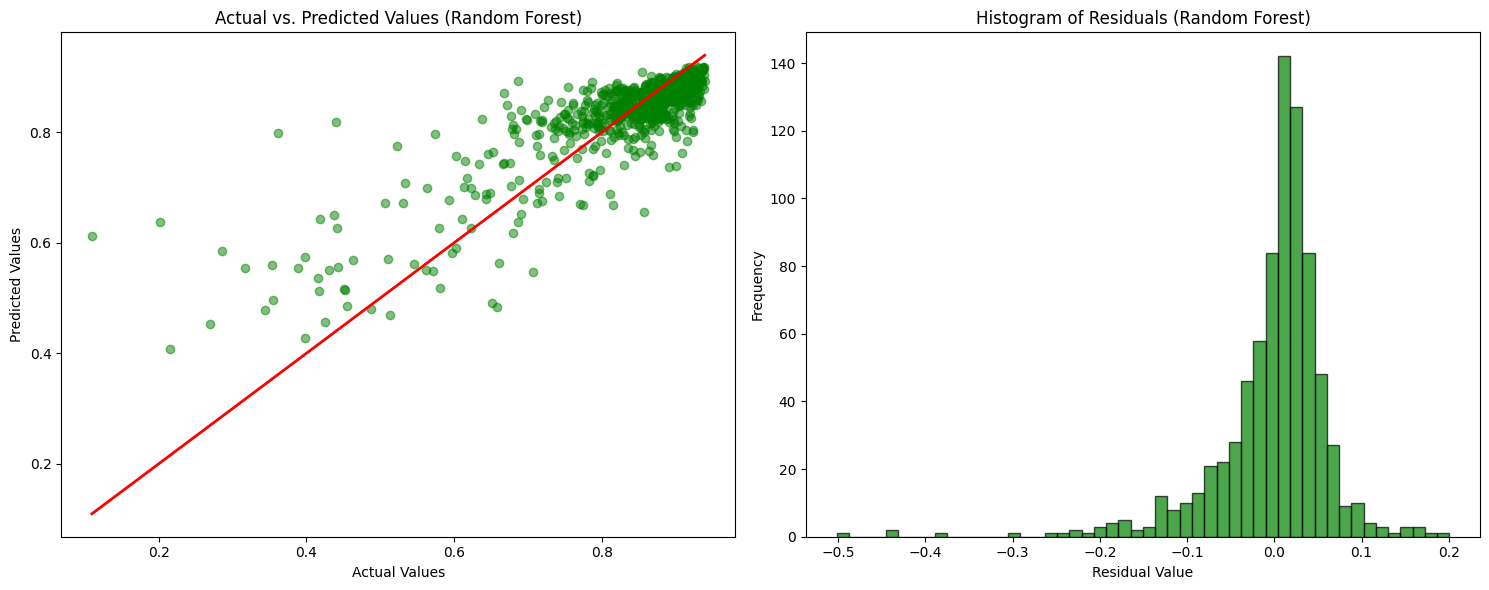

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate residuals
residuals_rf = y_test - y_pred_rf

# Generate the plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Scatter plot of actual vs. predicted values
ax[0].scatter(y_test, y_pred_rf, alpha=0.5, color='green')
ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
ax[0].set_xlabel('Actual Values')
ax[0].set_ylabel('Predicted Values')
ax[0].set_title('Actual vs. Predicted Values (Random Forest)')

# Histogram of residuals
ax[1].hist(residuals_rf, bins=50, edgecolor='k', alpha=0.7, color='green')
ax[1].set_xlabel('Residual Value')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Residuals (Random Forest)')

plt.tight_layout()
plt.show()


The visualization you provided consists of two key plots:

1- Actual vs. Predicted Values (Scatter Plot)

Interpretation: The scatter plot compares the actual values from the test set (x-axis) with the predicted values from your Gradient Boosting model (y-axis). The red line represents the ideal scenario where the predicted values would perfectly match the actual values (i.e., a perfect prediction). In this case, the green points show a fairly strong concentration along the red line, especially towards the higher values, indicating a good fit. However, there are noticeable deviations, particularly for the lower actual values where predictions scatter further from the line.

2- Histogram of Residuals (Residual Distribution)

Interpretation: This plot shows the distribution of residuals, which are the differences between actual and predicted values. The residuals are centered around zero, with the bulk of the values distributed close to zero, indicating that the model's errors are small and balanced around the actual values. However, you also see some longer tails on both sides, particularly more prominent on the left (negative residuals). This suggests that while most predictions are close to the actual values, the model tends to slightly underpredict in some cases (since negative residuals indicate underpredictions).

Conclusion: The residuals are mostly normally distributed and centered around zero, which is generally a sign of a well-performing model.


## Gradient Boosting Regressor

In [60]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [61]:
import numpy as np

# Evaluate Gradient Boosting model
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)  # Calculate RMSE
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regressor")
print("Mean Squared Error (MSE):", mse_gb)
print("Root Mean Squared Error (RMSE):", rmse_gb)
print("R-squared (R2) score:", r2_gb)

Gradient Boosting Regressor
Mean Squared Error (MSE): 0.004599119057250901
Root Mean Squared Error (RMSE): 0.06781680512417922
R-squared (R2) score: 0.6662659180379435


## Model Tuning 

### RandomizedSearchCV 

 ## Gradient Boosting Regressor (RandomizedSearchCV)

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Initialize the GradientBoostingRegressor model
model = GradientBoostingRegressor()

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=50, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Retrieve the best model and parameters
best_model = random_search.best_estimator_  # Assign the best model to 'best_model'
print("Best Parameters found by RandomizedSearchCV:", random_search.best_params_)
print("Best Score achieved during cross-validation:", random_search.best_score_)

# Make predictions on the test set using the best Gradient Boosting model
y_pred = best_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

# Display the results
print("Test Set Mean Squared Error (MSE):", mse)
print("Test Set Root Mean Squared Error (RMSE):", rmse)
print("Test Set R-squared (R2) score:", r2)


Best Parameters found by RandomizedSearchCV: {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 6, 'learning_rate': 0.1}
Best Score achieved during cross-validation: 0.6139332612361674
Test Set Mean Squared Error (MSE): 0.004365170746773661
Test Set Root Mean Squared Error (RMSE): 0.06606943882593268
Test Set R-squared (R2) score: 0.6832423267048602


In [68]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Initialize the GradientBoostingRegressor model
model = GradientBoostingRegressor()

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=50, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Retrieve the best model and parameters
best_model = random_search.best_estimator_  # Assign the best model to 'best_model'
print("Best Parameters found by RandomizedSearchCV:", random_search.best_params_)
print("Best Score achieved during cross-validation:", random_search.best_score_)

# Make predictions on the test set using the best Gradient Boosting model
y_pred = best_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

# Display the results
print("Test Set Mean Squared Error (MSE):", mse)
print("Test Set Root Mean Squared Error (RMSE):", rmse)
print("Test Set R-squared (R2) score:", r2)


Best Parameters found by RandomizedSearchCV: {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 6, 'learning_rate': 0.1}
Best Score achieved during cross-validation: 0.5952653588969836
Test Set Mean Squared Error (MSE): 0.004581046681989864
Test Set Root Mean Squared Error (RMSE): 0.06768342989232937
Test Set R-squared (R2) score: 0.6675773360489878


The RandomizedSearchCV identified the best hyperparameters for the Gradient Boosting Regressor model, resulting in a cross-validated R-squared score of approximately 0.67. This means the model explains about 67% of the variance in the target variable, indicating a moderate fit. The optimal parameters include a learning rate of 0.1, which balances the contribution of each tree, and a maximum depth of 6, allowing the trees to capture more complex patterns. The model uses 300 estimators (trees), and each tree is built using a subset of features determined by the square root of the total number of features (max_features='sqrt'). Additionally, the model requires at least 5 samples to split a node and 2 samples to form a leaf node, while using all the available data (subsample=1.0) for each boosting iteration.

## Results - Actual VS Predicted - Histogram of Residuals

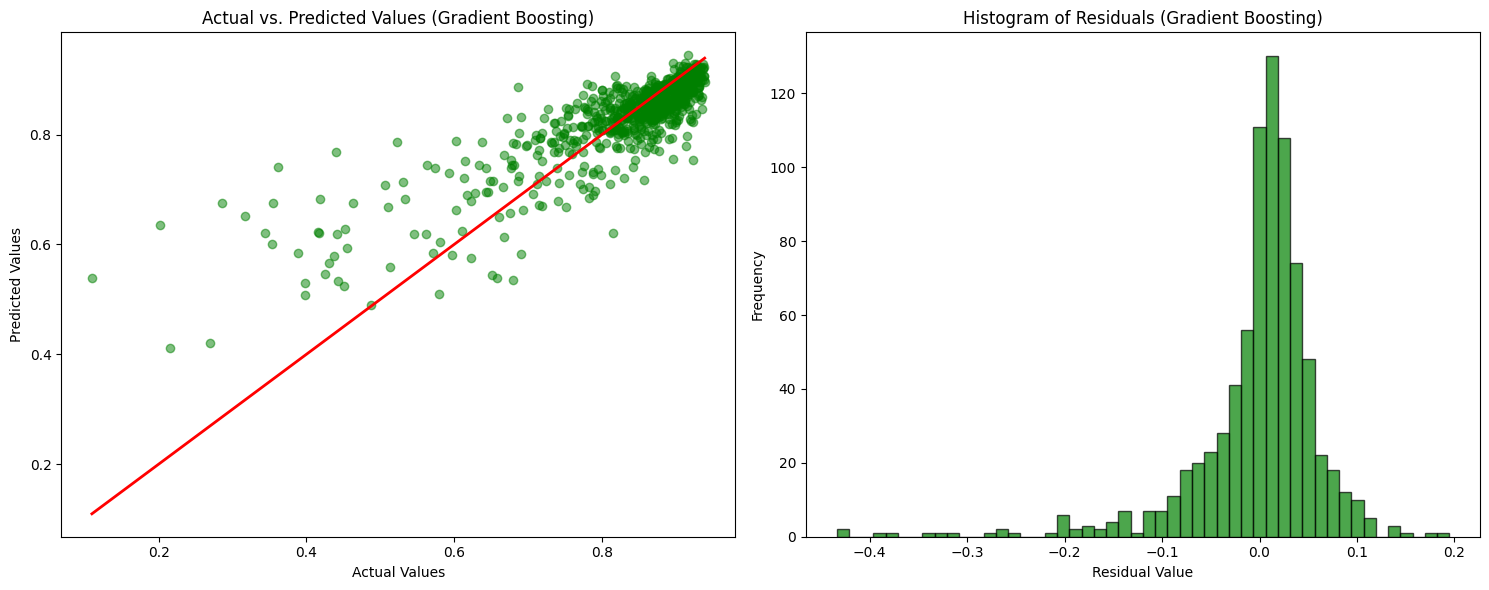

In [63]:
# Generate the plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Scatter plot of actual vs. predicted values
ax[0].scatter(y_test, y_pred, alpha=0.5, color='green')
ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
ax[0].set_xlabel('Actual Values')
ax[0].set_ylabel('Predicted Values')
ax[0].set_title('Actual vs. Predicted Values (Gradient Boosting)')

# Histogram of residuals
ax[1].hist(residuals, bins=50, edgecolor='k', alpha=0.7, color='green')
ax[1].set_xlabel('Residual Value')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Residuals (Gradient Boosting)')

plt.tight_layout()
plt.show()

The visualization you provided consists of two key plots:

1- Actual vs. Predicted Values (Scatter Plot)

Interpretation:
        The scatter plot compares the actual values from the test set (x-axis) with the predicted values from your Gradient Boosting model (y-axis).
        The red line represents the ideal scenario where the predicted values would perfectly match the actual values (i.e., a perfect prediction).
        In this case, the green points show a fairly strong concentration along the red line, especially towards the higher values, indicating a good fit. However, there are noticeable deviations, particularly for the lower actual values where predictions scatter further from the line.

2- Histogram of Residuals (Residual Distribution)

Interpretation:
        This plot shows the distribution of residuals, which are the differences between actual and predicted values.
        The residuals are centered around zero, with the bulk of the values distributed close to zero, indicating that the model's errors are small and balanced around the actual values.
        However, you also see some longer tails on both sides, particularly more prominent on the left (negative residuals). This suggests that while most predictions are close to the actual values, the model tends to slightly underpredict in some cases (since negative residuals indicate underpredictions). 
        
Conclusion: The residuals are mostly normally distributed and centered around zero, which is generally a sign of a well-performing model.

## Conclusion

In this notebook, we performed a comprehensive analysis to build a predictive model. Initially, we imported the species dataset, addressed missing values by imputing them with the mean, and performed dataset encoding, including one-hot encoding of relevant columns. Irrelevant columns were removed, and outliers were treated to improve data quality. Subsequently, we applied Min-Max Scaling to normalize the feature values.

Three models were evaluated initially—Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor. The results showed that the initial R-squared scores were relatively low, with Linear Regression scoring an R-squared of 0.15, Random Forest Regressor achieving 0.16, and Gradient Boosting Regressor having 0.16 as well. This indicated that the models were not performing optimally.

To enhance model performance, we performed feature engineering by augmenting the data (merging additional datasets (species.csv and specabund) and feature scaling by standard scalar. After repeating the preprocessing steps, we observed a significant improvement. The Linear Regression model’s R-squared score increased to 0.47, while the Random Forest Regressor achieved 0.69, and the Gradient Boosting Regressor reached 0.67.Both the Random Forest Regressor and Gradient Boosting Regressor performed well, achieving R-squared scores of 0.69 and 0.67, respectively, indicating a strong fit to the data compared to the Linear Regression model.

Further model tuning using RandomizedSearchCV for the Gradient Boosting Regressor yielded the best parameters: subsample of 1.0, 300 estimators, minimum samples split of 5, minimum samples leaf of 2, maximum features as 'sqrt', maximum depth of 6, and a learning rate of 0.1. With these parameters, the best R-squared score achieved was 0.67.

Overall, the process of feature engineering and hyperparameter tuning led to substantial improvements in model performance, demonstrating the effectiveness of these techniques in enhancing predictive accuracy.
